In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# read data from CSV file into a dataframe
df1 = pd.read_csv('output_Ssend.csv')
df2 = pd.read_csv('output_Bsend.csv')


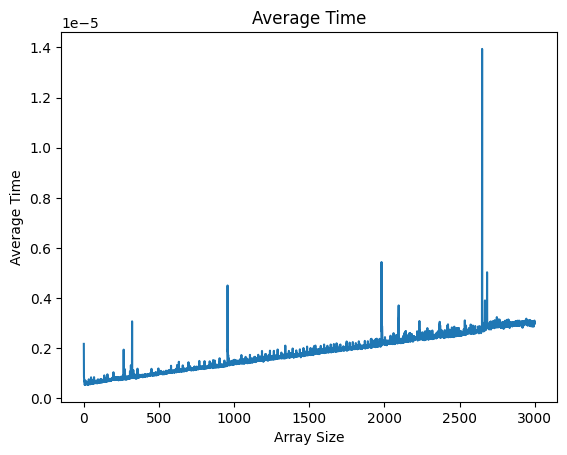

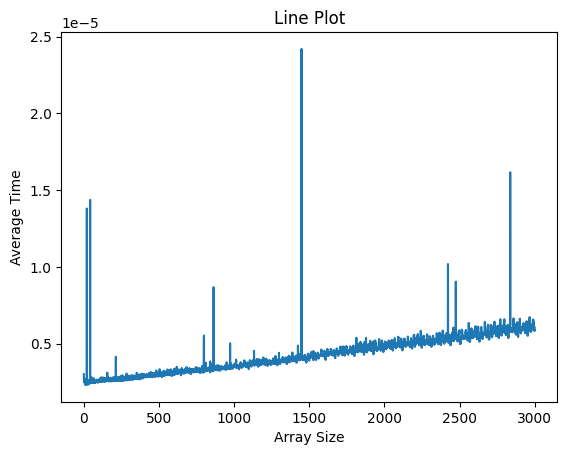

In [77]:

# plot data
plt.plot(df1['Array Size'], df1['Average Time'])

# set axis labels and title
plt.xlabel('Array Size')
plt.ylabel('Average Time')
plt.title('Average Time')

# display the plot
plt.show()



# plot data
plt.plot(df2['Array Size'], df2['Average Time'])

# set axis labels and title
plt.xlabel('Array Size')
plt.ylabel('Average Time')
plt.title('Line Plot')

# display the plot
plt.show()


Coefficients: 
 [[8.33228309e-10]]
Intercept: 
 [5.71626031e-07]
Mean squared error: 0.00
Variance score: 0.89


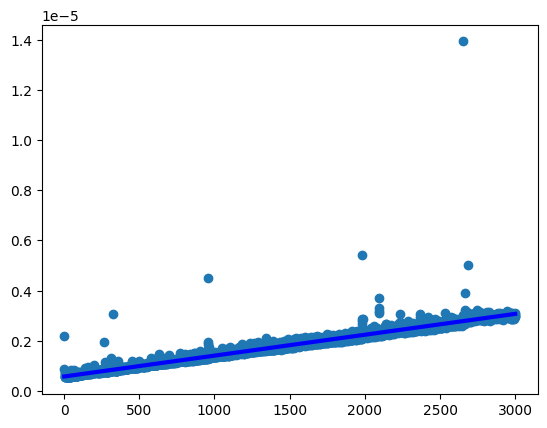

In [78]:
# Create linear regression object
regr = linear_model.LinearRegression()
training_X = np.array(df1['Array Size'])
training_X = training_X.reshape(-1, 1)
training_y = np.array(df1['Average Time'])
training_y = training_y.reshape(-1, 1)
# Train the model using the training sets
regr.fit(training_X, training_y)

# Make predictions using the testing set
training_y_pred = regr.predict(training_X)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(training_y, training_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(training_y, training_y_pred))

plt.scatter(training_X, training_y)
plt.plot(training_X, training_y_pred, color='blue', linewidth=3)
#plt.ylim(top=2.5 *(10**-6))

plt.show()

Coefficients: 
 [[1.21971194e-09]]
Intercept: 
 [2.38639349e-06]
Mean squared error: 0.00
Variance score: 0.78


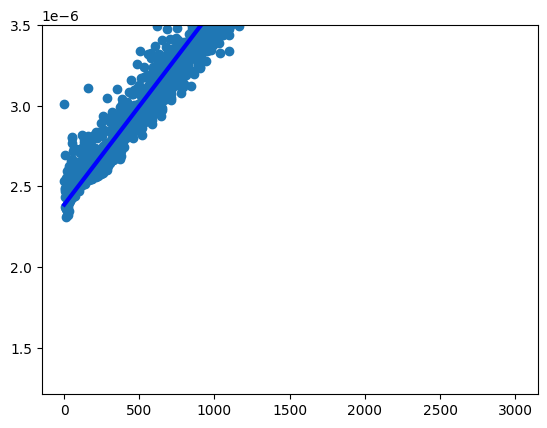

In [79]:
# Create linear regression object
regr = linear_model.LinearRegression()
training_X = np.array(df2['Array Size'])
training_X = training_X.reshape(-1, 1)
training_y = np.array(df2['Average Time'])
training_y = training_y.reshape(-1, 1)
# Train the model using the training sets
regr.fit(training_X, training_y)

# Make predictions using the testing set
training_y_pred = regr.predict(training_X)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(training_y, training_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(training_y, training_y_pred))

plt.scatter(training_X, training_y)
plt.plot(training_X, training_y_pred, color='blue', linewidth=3)
plt.ylim(top=3.5 *(10**-6))

plt.show()

Text(0.5, 1.0, 'Network bandwith: synchronous communication (MPI_Ssend)')

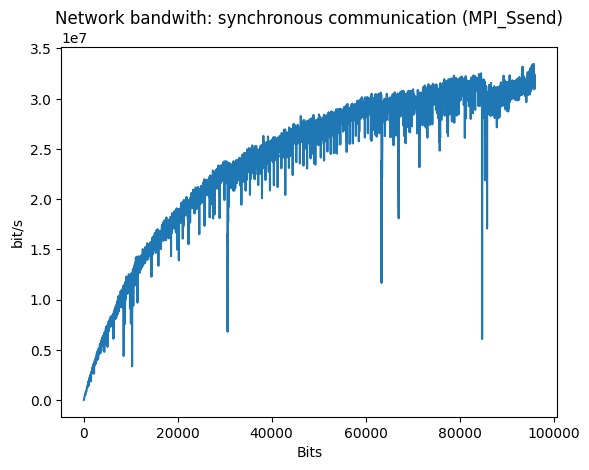

In [80]:
array_size_bits_ss = np.array(df1['Array Size']) * 32
array_delay_ss = np.array(df1['Average Time'])

array_bits_per_second_ss = np.divide(array_size_bits_ss, array_delay_ss) / 1000

# plot data
plt.plot(array_size_bits_ss, array_bits_per_second_ss)

# set axis labels and title
plt.xlabel('Bits')
plt.ylabel('bit/s')
plt.title('Network bandwith: synchronous communication (MPI_Ssend)')

Text(0.5, 1.0, 'Network bandwith: buffer communication (MPI_Bsend)')

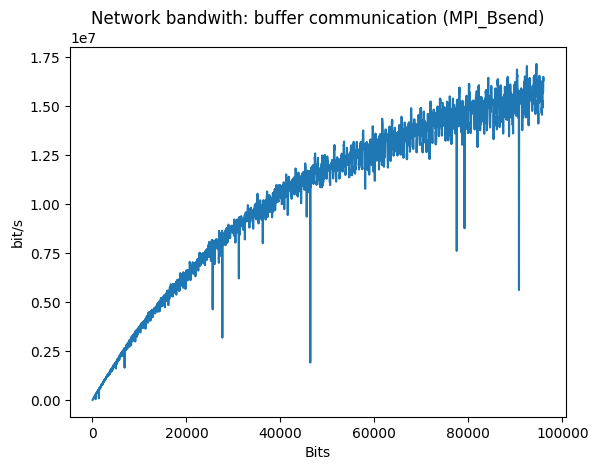

In [81]:
array_size_bits_bf = np.array(df2['Array Size']) * 32
array_delay_bf = np.array(df2['Average Time'])

array_bits_per_seconds_bf = np.divide(array_size_bits_bf, array_delay_bf) / 1000

# plot data
plt.plot(array_size_bits_bf, array_bits_per_seconds_bf)

# set axis labels and title
plt.xlabel('Bits')
plt.ylabel('bit/s')
plt.title('Network bandwith: buffer communication (MPI_Bsend)')

Text(0.5, 1.0, 'Network bandwith: synchronous communication (MPI_Ssend)')

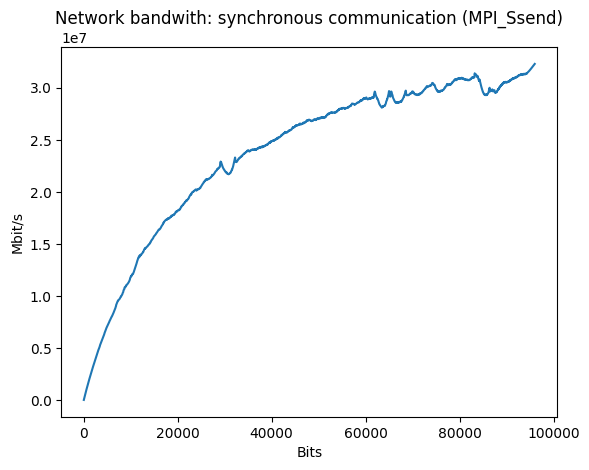

In [82]:
from scipy.signal import savgol_filter

array_bits_per_second_ss_filt = savgol_filter(array_bits_per_second_ss, 101, 3)

# plot data
plt.plot(array_size_bits_ss, array_bits_per_second_ss_filt)

# set axis labels and title
plt.xlabel('Bits')
plt.ylabel('Mbit/s')
plt.title('Network bandwith: synchronous communication (MPI_Ssend)')

Text(0.5, 1.0, 'Network bandwith: buffer communication (MPI_Bsend)')

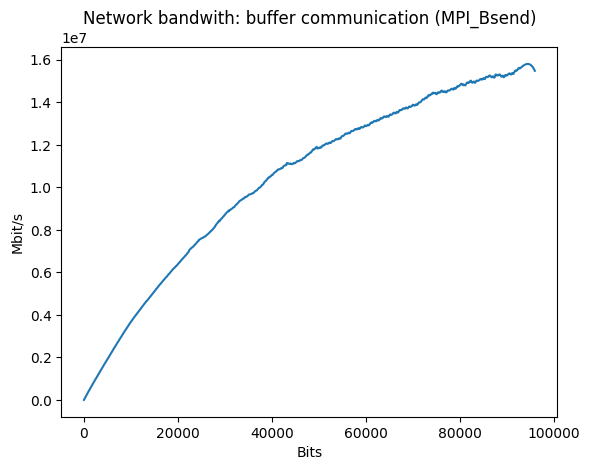

In [83]:

array_bits_per_second_bf_filt = savgol_filter(array_bits_per_seconds_bf, 201, 3)


# plot data
plt.plot(array_size_bits_bf, array_bits_per_second_bf_filt)

# set axis labels and title
plt.xlabel('Bits')
plt.ylabel('Mbit/s')
plt.title('Network bandwith: buffer communication (MPI_Bsend)')

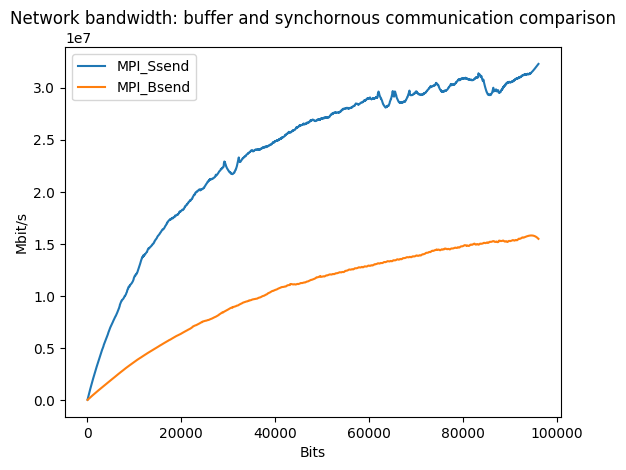

In [84]:
plt.plot(array_size_bits_ss, array_bits_per_second_ss_filt, label = "MPI_Ssend")
plt.plot(array_size_bits_bf, array_bits_per_second_bf_filt, label = "MPI_Bsend")

plt.xlabel('Bits')
plt.ylabel('Mbit/s')
plt.title('Network bandwidth: buffer and synchornous communication comparison')

plt.legend()
plt.show()

2 nodes:
Rank: 1; Hostanme: dc1a-lab-vnode-02.ipa.ki.agh.edu.pl
Rank: 0; Hostanme: dc1a-lab-vnode-01.ipa.ki.agh.edu.pl

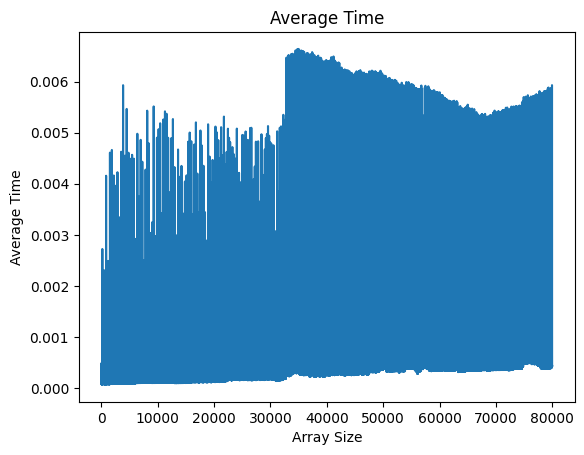

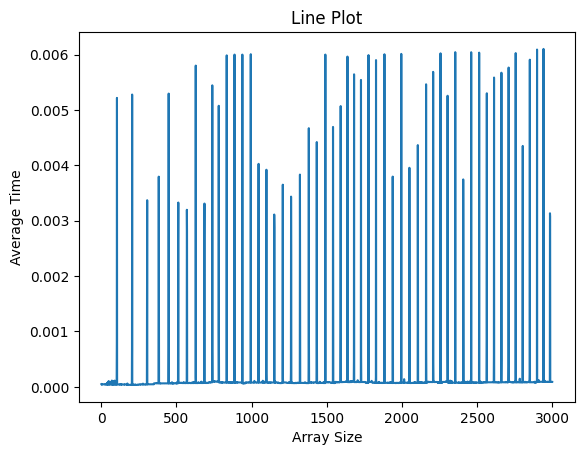

In [85]:
# read data from CSV file into a dataframe
df2 = pd.read_csv('output_Bsend_2nodes.csv')
df1 = pd.read_csv('output_Ssend_2nodes.csv')

# plot data
plt.plot(df1['Array Size'], df1['Average Time'])

# set axis labels and title
plt.xlabel('Array Size')
plt.ylabel('Average Time')
plt.title('Average Time')

# display the plot
plt.show()

# plot data
plt.plot(df2['Array Size'], df2['Average Time'])

# set axis labels and title
plt.xlabel('Array Size')
plt.ylabel('Average Time')
plt.title('Line Plot')

# display the plot
plt.show()

Text(0.5, 1.0, 'Network bandwith: synchronous communication (MPI_Ssend)')

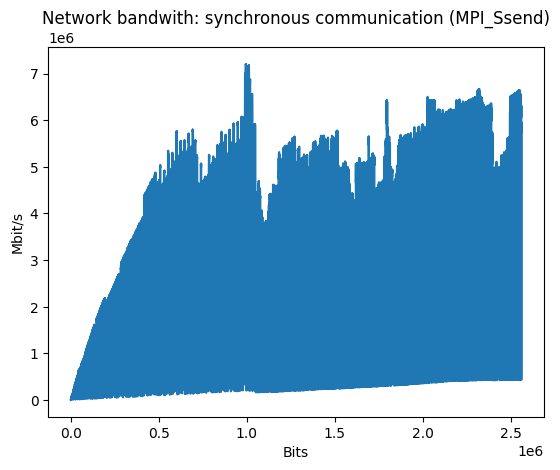

In [86]:
array_size_bits_ss = np.array(df1['Array Size']) * 32
array_delay_ss = np.array(df1['Average Time'])

array_bits_per_second_ss = np.divide(array_size_bits_ss, array_delay_ss) / 1000

# plot data
plt.plot(array_size_bits_ss, array_bits_per_second_ss)

# set axis labels and title
plt.xlabel('Bits')
plt.ylabel('Mbit/s')
plt.title('Network bandwith: synchronous communication (MPI_Ssend)')

Text(0.5, 1.0, 'Network bandwith: buffer communication (MPI_Bsend)')

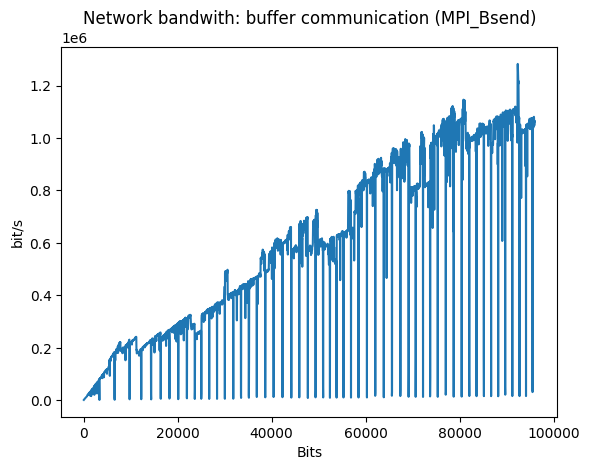

In [87]:
array_size_bits_bf = np.array(df2['Array Size']) * 32
array_delay_bf = np.array(df2['Average Time'])

array_bits_per_seconds_bf = np.divide(array_size_bits_bf, array_delay_bf) / 1000

# plot data
plt.plot(array_size_bits_bf, array_bits_per_seconds_bf)

# set axis labels and title
plt.xlabel('Bits')
plt.ylabel('bit/s')
plt.title('Network bandwith: buffer communication (MPI_Bsend)')

Text(0.5, 1.0, 'Network bandwith: buffer communication (MPI_Bsend)')

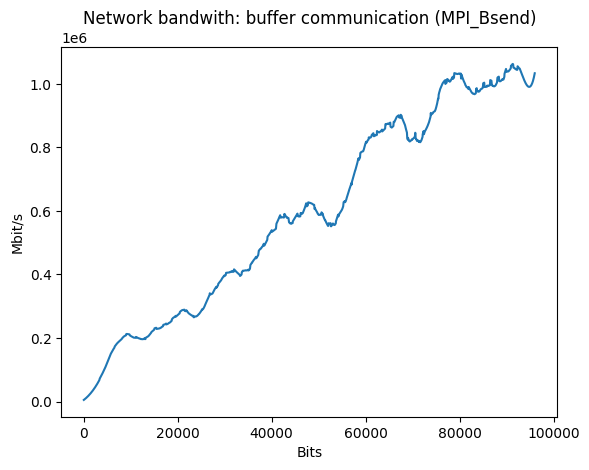

In [88]:
array_bits_per_second_bf_filt = savgol_filter(array_bits_per_seconds_bf, 201, 3)


# plot data
plt.plot(array_size_bits_bf, array_bits_per_second_bf_filt)

# set axis labels and title
plt.xlabel('Bits')
plt.ylabel('Mbit/s')
plt.title('Network bandwith: buffer communication (MPI_Bsend)')

Text(0.5, 1.0, 'Network bandwith: buffer communication (MPI_Bsend)')

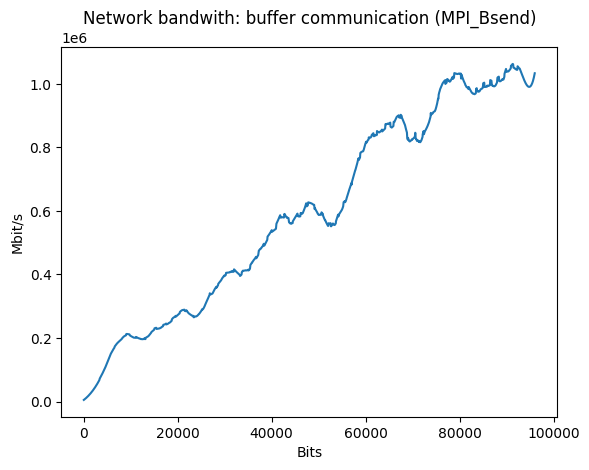

In [89]:

array_bits_per_second_bf_filt = savgol_filter(array_bits_per_seconds_bf, 201, 3)


# plot data
plt.plot(array_size_bits_bf, array_bits_per_second_bf_filt)

# set axis labels and title
plt.xlabel('Bits')
plt.ylabel('Mbit/s')
plt.title('Network bandwith: buffer communication (MPI_Bsend)')

ValueError: x and y must have same first dimension, but have shapes (8000,) and (3000,)

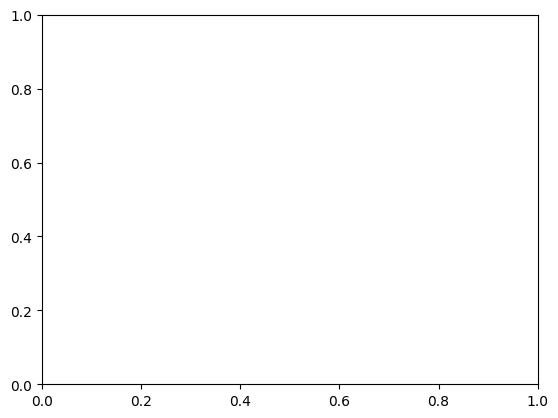

In [90]:
plt.plot(array_size_bits_ss, array_bits_per_second_ss_filt, label = "MPI_Ssend")
plt.plot(array_size_bits_bf, array_bits_per_second_bf_filt, label = "MPI_Bsend")

plt.xlabel('Bits')
plt.ylabel('Mbit/s')
plt.title('Network bandwidth: buffer and synchornous communication comparison')

plt.legend()
plt.show()